In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [4]:
# import data ('/DATA/SPRMP/CSR_Coordination/Traction/Sentiment analysis/data/Montel_Results/test_results.csv')

# test_results = pd.read_csv('/Users/yokos/Downloads/test_results.csv')

In [31]:
# function to derive confusion matrix 

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

            
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    
    # normalization True/False
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    # heat map of confusion matrix
    fig, ax = plt.subplots(figsize = (6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax, cm

np.set_printoptions(precision=2)

Confusion matrix, without normalization


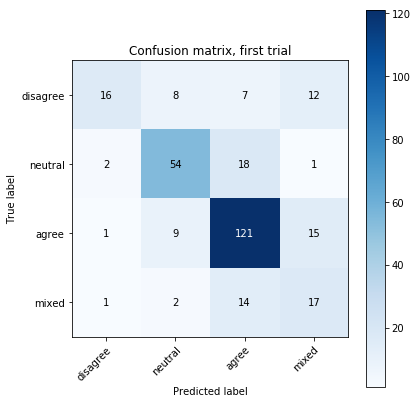

In [38]:
# Plot non-normalized confusion matrix

y_true = test_results.true_labels
y_pred = test_results.pred_ids
class_names = np.array(['disagree','neutral','agree', 'mixed'])

ax,cm = plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, first trial')


plt.show()

In [40]:
# derive accuracy, precision, recall and F1 score

# accuracy
display(sum(test_results.true_labels == test_results.pred_ids)/len(test_results))

# precision
# recall 
# f1 score

precision_recall_fscore_support(y_true, y_pred, average=None)

0.697986577181208

(array([0.8 , 0.74, 0.76, 0.38]),
 array([0.37, 0.72, 0.83, 0.5 ]),
 array([0.51, 0.73, 0.79, 0.43]),
 array([ 43,  75, 146,  34], dtype=int64))